<a href="https://colab.research.google.com/github/drusho/fireworks_data_exploration/blob/main/firework_sales_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem (Hypothetical): Business (A) sells fireworks across the United States.  The company would like to prepare a upcoming 4th of July celebration.  These questions need to be answered.

* Which days to advertise for Fireworks for this upcoming 4th of July.
* Which states to advertise in.
* Which products to promote to different age groups.

Inspiration: 
- https://www.valuepenguin.com/who-uses-most-fireworks-united-states

- https://www.americanpyro.com/industry-facts-figures

__Data__

* [Firework Injury Reports](https://www.cpsc.gov/cgibin/NEISSQuery/UserCriteria.aspx?UserAff=5x08cgz9T6YPDAZJzvlZjA%3d%3d&UserAffOther=9OYR9kUytIsLilKZieD5xg%3d%3d)

### Import Libraries 

In [543]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [544]:
injury = 'https://github.com/drusho/fireworks_data_exploration/raw/main/data/data_clean/df_injury_clean.csv'
df_injury = pd.read_csv(injury,usecols=[1,2,3,4,5,6,7,8,9,10])
df_injury.head()

,Treatment_Date,Age,Sex,Alcohol,Drug,Narrative,Incident Locale,Body_Part,Diagnosis,Disposition
0,1/1/16,39,Male,NaN,NaN,39YOM WAS LIGHTING BOTTLE ROCKETS AND ONE FLEW...,Home,Eyeball,"Contusions, Abrasions",Treated/Untreated and Released
1,1/1/16,13,Male,NaN,NaN,13YOM SOMEONE POINTED FIREWORKS AT HIM FROM 10...,Home,Eyeball,"Contusions, Abrasions",Treated/Untreated and Released
2,7/5/16,31,Female,NaN,NaN,A 31YOF WAS STRUCK TO EYE WITH PIECE OF FIRECR...,Home,Eyeball,"Contusions, Abrasions",Treated/Untreated and Released
3,7/5/16,3,Male,NaN,NaN,A 3YOM WAS HIT IN EYE WITH REMNANTS OF EXPLODE...,Home,Eyeball,"Contusions, Abrasions",Treated/Untreated and Released
4,7/3/16,8,Male,NaN,NaN,"8YOM SHOOTING FIREWORKS, ONE FAILED TO LAUNCH ...",Home,Eyeball,"Contusions, Abrasions",Treated/Untreated and Released


In [545]:
df_injury.Treatment_Date = pd.to_datetime(df_injury.Treatment_Date)
df_injury.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1532 entries, 0 to 1531
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Treatment_Date   1532 non-null   datetime64[ns]
 1   Age              1532 non-null   int64         
 2   Sex              1532 non-null   object        
 3   Alcohol          701 non-null    float64       
 4   Drug             701 non-null    float64       
 5   Narrative        1532 non-null   object        
 6   Incident Locale  1532 non-null   object        
 7   Body_Part        1532 non-null   object        
 8   Diagnosis        1532 non-null   object        
 9   Disposition      1532 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 119.8+ KB


In [546]:
df_injury.head()

,Treatment_Date,Age,Sex,Alcohol,Drug,Narrative,Incident Locale,Body_Part,Diagnosis,Disposition
0,2016-01-01,39,Male,NaN,NaN,39YOM WAS LIGHTING BOTTLE ROCKETS AND ONE FLEW...,Home,Eyeball,"Contusions, Abrasions",Treated/Untreated and Released
1,2016-01-01,13,Male,NaN,NaN,13YOM SOMEONE POINTED FIREWORKS AT HIM FROM 10...,Home,Eyeball,"Contusions, Abrasions",Treated/Untreated and Released
2,2016-07-05,31,Female,NaN,NaN,A 31YOF WAS STRUCK TO EYE WITH PIECE OF FIRECR...,Home,Eyeball,"Contusions, Abrasions",Treated/Untreated and Released
3,2016-07-05,3,Male,NaN,NaN,A 3YOM WAS HIT IN EYE WITH REMNANTS OF EXPLODE...,Home,Eyeball,"Contusions, Abrasions",Treated/Untreated and Released
4,2016-07-03,8,Male,NaN,NaN,"8YOM SHOOTING FIREWORKS, ONE FAILED TO LAUNCH ...",Home,Eyeball,"Contusions, Abrasions",Treated/Untreated and Released


In [547]:
# Alcohol Related Incidents 
df_injury.query('Alcohol > 0.0').sort_values(by='Age').head()

,Treatment_Date,Age,Sex,Alcohol,Drug,Narrative,Incident Locale,Body_Part,Diagnosis,Disposition
1290,2019-07-05,18,Male,1.0,0.0,18YOM WITH RIGHT HAND INJURY S/P FIREWORKS EXP...,Street or highway,Hand,Amputation,Held for observation
1292,2020-06-26,19,Male,1.0,1.0,19 YOM HAD A MORTAR FIREWORK (TYPE B) GO OFF I...,Street or highway,Hand,Amputation,Held for observation
1517,2020-07-05,20,Male,1.0,0.0,20 YOM WAS LIGHTING A MORTAR (TYPE B) IN THE S...,Manufactured (mobile) home,Finger,Amputation,Left against medical advice
535,2020-06-14,21,Male,1.0,0.0,21YOM WAS PLAYING WITH UNKNOWN FIRECRACKER WHI...,Home,Upper Trunk,"Burns, thermal (from flames or hot surface)",Treated/Untreated and Released
939,2020-08-13,21,Male,1.0,0.0,21 YOM INTOXICATED WHEN FIREWORK EXPLODED IN H...,Home,Hand,Laceration,Treated/Untreated and Released


In [548]:
# Drug Related Incidents 
df_injury.query('Drug > 0.0').sort_values(by='Age').head()

,Treatment_Date,Age,Sex,Alcohol,Drug,Narrative,Incident Locale,Body_Part,Diagnosis,Disposition
1292,2020-06-26,19,Male,1.0,1.0,19 YOM HAD A MORTAR FIREWORK (TYPE B) GO OFF I...,Street or highway,Hand,Amputation,Held for observation
298,2019-01-01,23,Male,1.0,1.0,"23YOM W/BURNS TO BILAT EYES, FOREIGN BODIES OF...",Home,Eyeball,"Burns, thermal (from flames or hot surface)",Treated/Untreated and Released
1234,2019-07-05,32,Male,1.0,1.0,32 YOM HAS CONFLICTING STORIES OF INJURY. PT C...,Street or highway,Hand,"Burns, thermal (from flames or hot surface)",Held for observation
798,2020-08-23,47,Male,0.0,1.0,47YOM WAS HANDLING FIREWORKS WHILE HIGH ON COC...,Home,Lower Leg,"Burns, thermal (from flames or hot surface)",Treated/Untreated and Released
1291,2020-05-19,56,Male,1.0,1.0,56 YOM WAS DRINKING ALCOHOL WITH A FRIEND AT A...,Street or highway,Hand,Amputation,Held for observation


In [549]:
# Convert Alcohol to Yes/No
df_injury.Alcohol = df_injury['Alcohol'].fillna(0.0).astype('float')
df_injury.Alcohol = df_injury['Alcohol'].replace(1.0,"Yes").replace(0.0,"No")

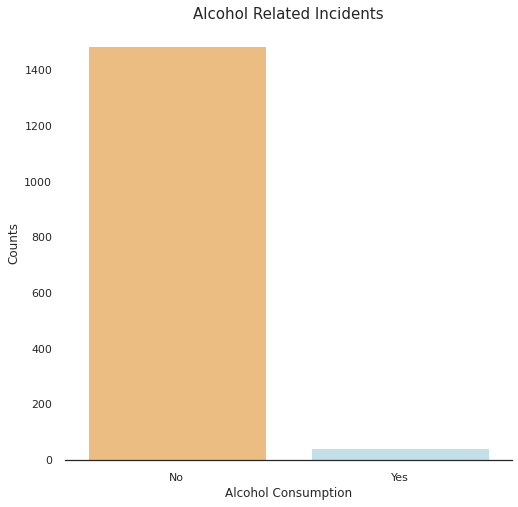

In [550]:
#fill nan values in Alcohol with zeros

#define figure size
sns.set(rc={"figure.figsize":(8, 8)})

#set background to white
sns.set_style("white")

ax = sns.countplot(x="Alcohol", 
                   data=df_injury, 
                   palette="RdYlBu")

#set x,y labelss
ax.set(ylabel='Counts',
       xlabel='Alcohol Consumption')

#set titles
ax.set_title('Alcohol Related Incidents', 
             fontdict = {'fontsize': 15})

# remove spines
sns.despine(left=True)

#save to png
ax.figure.savefig("Alcohol Related Incidents.png")

plt.show()

In [551]:
# Sort DF by treatment date
df_injury.sort_values(by = 'Treatment_Date',
                      inplace = True)

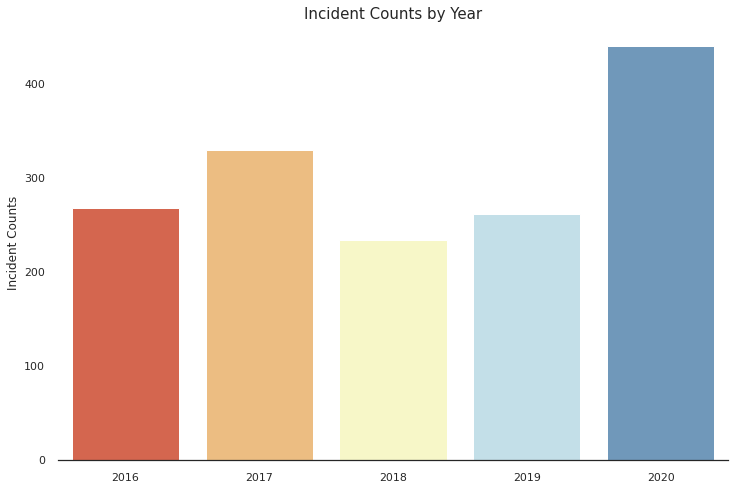

In [552]:
# Incident Counts by Year BarGraph

#define figure size
sns.set(rc = {"figure.figsize":(12,8)})

#set background to white
sns.set_style("white")

treamentDates = df_injury['Treatment_Date'].dt.year.value_counts().sort_index().reset_index()

ax = sns.barplot(y="Treatment_Date", 
                 x="index", 
                 data=treamentDates, 
                 palette="RdYlBu")

#set x,y labels
ax.set(xlabel='',
       ylabel='Incident Counts')

#set titles
ax.set_title('Incident Counts by Year', 
             fontdict = {'fontsize': 15})

#remove spiens
sns.despine(left=True)

#save to png
ax.figure.savefig("Incident Counts by Year.png")

plt.show()

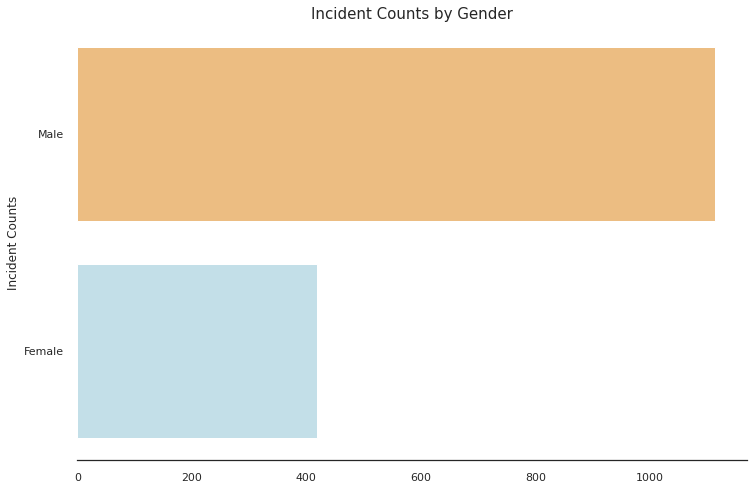

In [553]:
# Incident Counts by Sex

incidentSex = df_injury['Sex'].value_counts().reset_index(name='incidents')

#define figure size
sns.set(rc={"figure.figsize":(12, 8)})

#set background to white
sns.set_style("white")

ax = sns.barplot(x="incidents", 
                 y="index", 
                 data=incidentSex, 
                 palette="RdYlBu")

#set x,y labels
ax.set(xlabel='',
       ylabel='Incident Counts')

#set titles
ax.set_title('Incident Counts by Gender', 
             fontdict = {'fontsize':15})

#remove spines
sns.despine(left=True)

#save to png
ax.figure.savefig("Incident Counts by Gender.png")

plt.show()

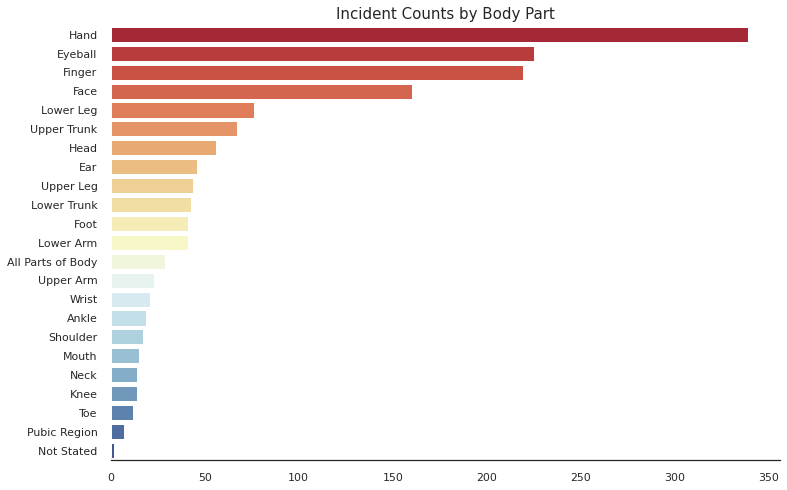

In [554]:
# Incident Counts by Body Part

#define figure size
sns.set(rc={"figure.figsize":(12,8)})

#set background color
sns.set_style("white")

incidentBp = df_injury['Body_Part'].value_counts().reset_index(name='incidents').head(23)

ax = sns.barplot(x="incidents", 
                 y="index", 
                 data=incidentBp, 
                 palette="RdYlBu")

#set x,y labels
ax.set(xlabel='',
       ylabel='')

#set title
ax.set_title('Incident Counts by Body Part', 
             fontdict = {'fontsize':15})

#remove spines
sns.despine(left=True)

#save to png
ax.figure.savefig("Incident Counts by Body Part.png")

plt.show()

# Fixing Age Column

Age Code

|Age Code|Description             |
|--------|------------------------|
|0       |No Recorded Age         |
|2       |2 Years Old             |
|45      |45 Years Old            |
|100     |100 Years Old           |
|102     |102 Years Old           |
|201     |Three Weeks Old         |
|201     |Four Weeks Old          |
|201     |Seven Weeks Old         |
|202     |Ten Weeks Old           |
|209     |Nine Months Old         |
|212     |Twelve months (one year)|
|218     |Eighteen months         |



If the patient is older than 115 years old, code the age as 115 and indicate the actual age in the Comment. If the ED record indicates the patient was born on January 1, 1900, please verify the patient’s age with hospital staff – some hospitals use this date when the patient’s age is unknown.

Please note: CPSC prefers that coders use the Date of Birth variable in lieu of the age variable. Mistakes in coded ages are common when patients have birthdays after the date of treatment and before the NEISS coder codes the case. Hospital medical record systems automatically update the age of the patient daily.
 

In [555]:
def fix_age(age):
  if 201 <= age <=209:
    age = 0
    return age
  elif age >=201:
    age = 1
    return age
  else:
    return age

df_injury['Age_Fix'] = df_injury['Age'].apply(fix_age)
df_injury.query('Age>=200').head()

,Treatment_Date,Age,Sex,Alcohol,Drug,Narrative,Incident Locale,Body_Part,Diagnosis,Disposition,Age_Fix
510,2016-01-01,216,Male,No,NaN,16MOM FAMILY PLAYING WITH FIREWORKS AND ONE SH...,Home,Upper Trunk,"Burns, thermal (from flames or hot surface)",Treated/Untreated and Released,1
313,2016-05-29,216,Male,No,NaN,16MOM GRABBED A LIT SMOKE BOMB OUT OF DAD'S HA...,Home,Hand,"Burns, thermal (from flames or hot surface)",Treated/Untreated and Released,1
326,2016-07-04,221,Female,No,NaN,21MOF- PT GRABBED W/ L HAND TYPE L FIREWORK BU...,Home,Hand,"Burns, thermal (from flames or hot surface)",Treated/Untreated and Released,1
833,2016-07-05,209,Female,No,NaN,9MOF HIT BY A FIRE WORK WHICH MISFIRED AND SUS...,Home,Lower Arm,"Burns, thermal (from flames or hot surface)",Treated/Untreated and Released,0
564,2016-07-06,207,Male,No,NaN,7MM A ?MOTOR-TYPE FIREWORK EXPLOSED WITHIN 5FT...,Home,Face,"Burns, thermal (from flames or hot surface)",Treated/Untreated and Released,0


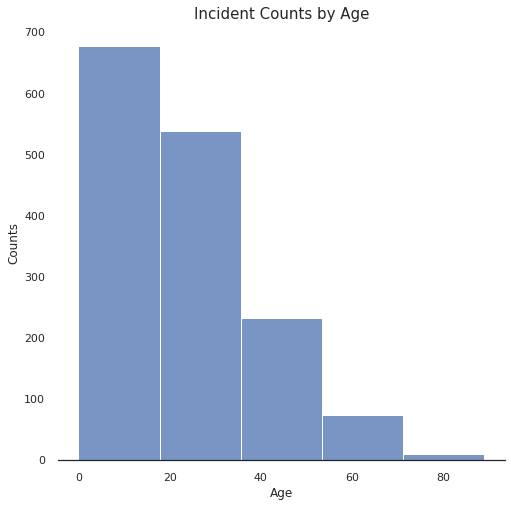

In [556]:
# Histogram of Ages

#set figsize
sns.set(rc={"figure.figsize":(8, 8)})

#set background color
sns.set_style("white")

ax = sns.histplot(data=df_injury, 
                  x='Age_Fix', 
                  bins=5)

#set x,y labels
ax.set(xlabel='Age',
       ylabel='Counts')

#set title
ax.set_title('Incident Counts by Age', 
             fontdict = {'fontsize':15})

#remove spines
sns.despine(left=True)

#save to png
ax.figure.savefig("Incident Counts by Age_Hist.png")

plt.show()

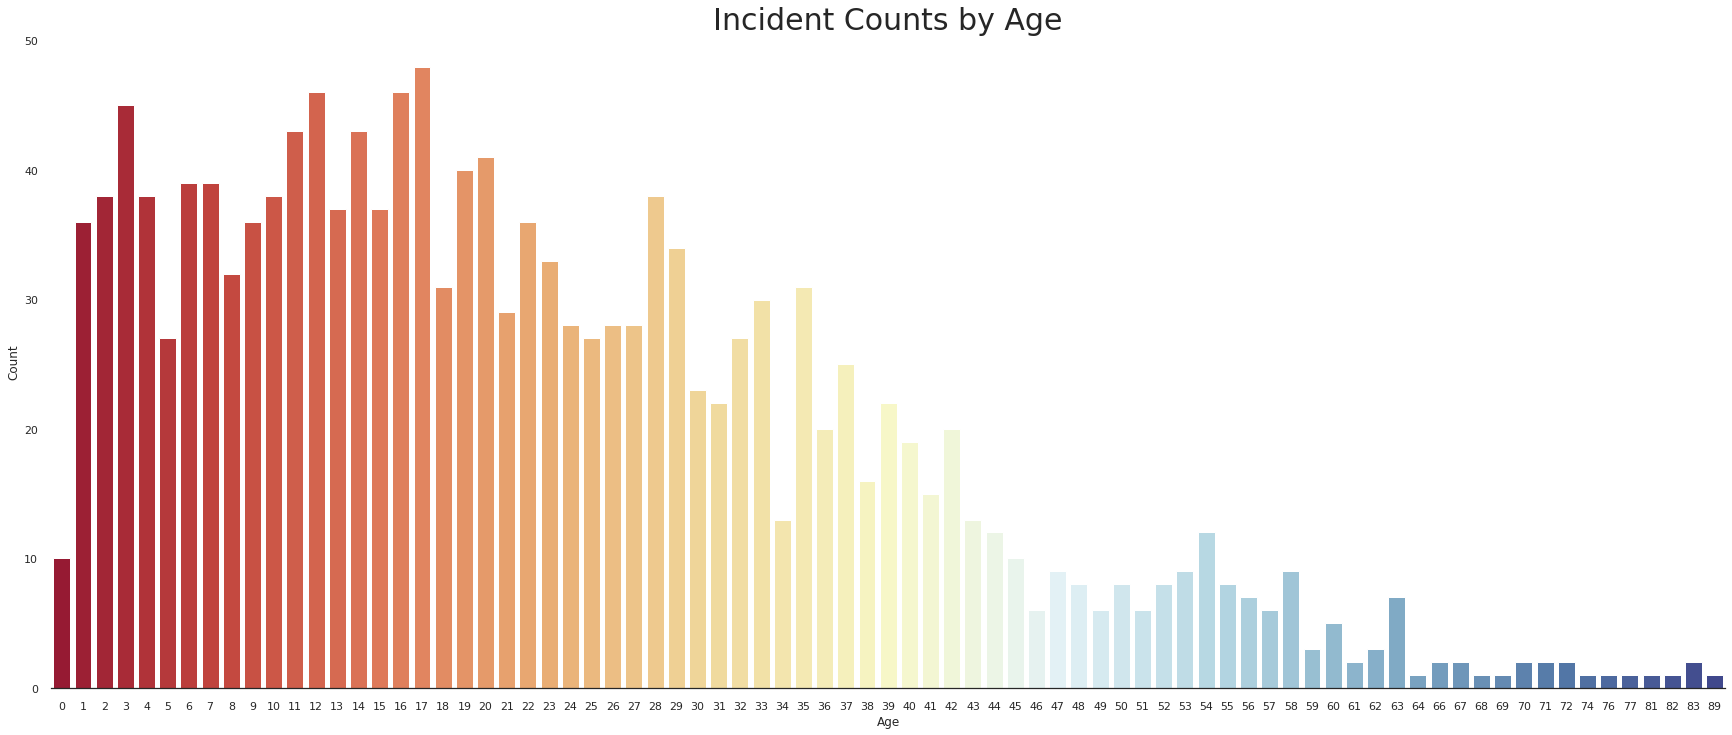

In [621]:
# Incident Counts by Age (Age_Fix)

#define figure size
sns.set(rc={"figure.figsize":(30, 12)})

#set background color
sns.set_style("white")

incidentAge = df_injury['Age_Fix'].value_counts().reset_index(name='incidents')

ax = sns.barplot(y="incidents", 
                 x="index", 
                 data=incidentAge, 
                 palette="RdYlBu")

#set x,y labels
ax.set(xlabel='Age',
       ylabel='Count')

#set title
ax.set_title('Incident Counts by Age', 
             fontdict = {'fontsize':30})

#remove spines
sns.despine(left=True)

#save to png
ax.figure.savefig("Incident Counts by Age_Bar.png")

plt.show()

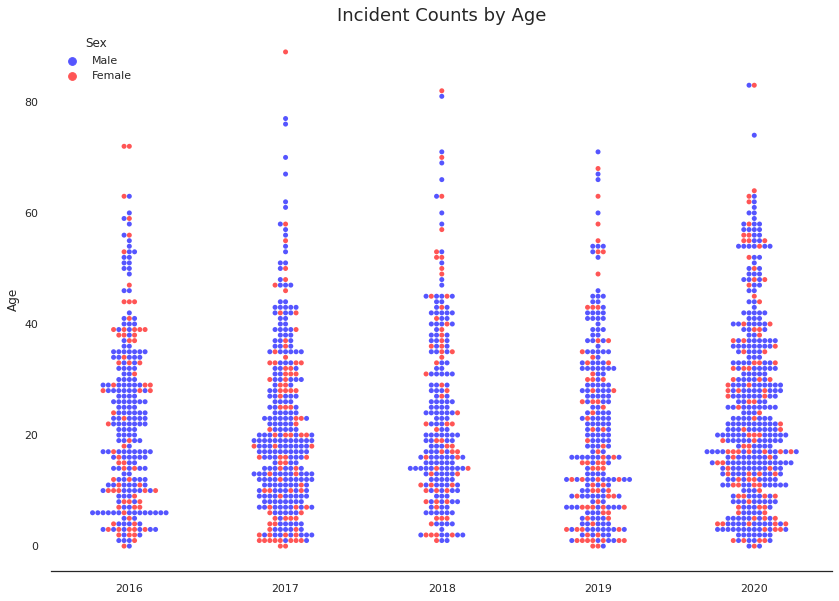

In [558]:
# Swarm graph by age, year, and alcohol

#define figure size
sns.set(rc={"figure.figsize":(14,10)})

#set background color
sns.set_style("white")

ax = sns.swarmplot(data = df_injury, 
                   x = df_injury['Treatment_Date'].dt.year, 
                   y = "Age_Fix",
                   hue = "Sex",
                   palette = "seismic")

#set x,y labels
ax.set(xlabel = '',
       ylabel = 'Age')

#set title
ax.set_title('Incident Counts by Age', 
             fontdict = {'fontsize':18})

#remove spines
sns.despine(left=True)

#save to png
ax.figure.savefig("Incident Counts by Age_Swarm.png")

plt.show()

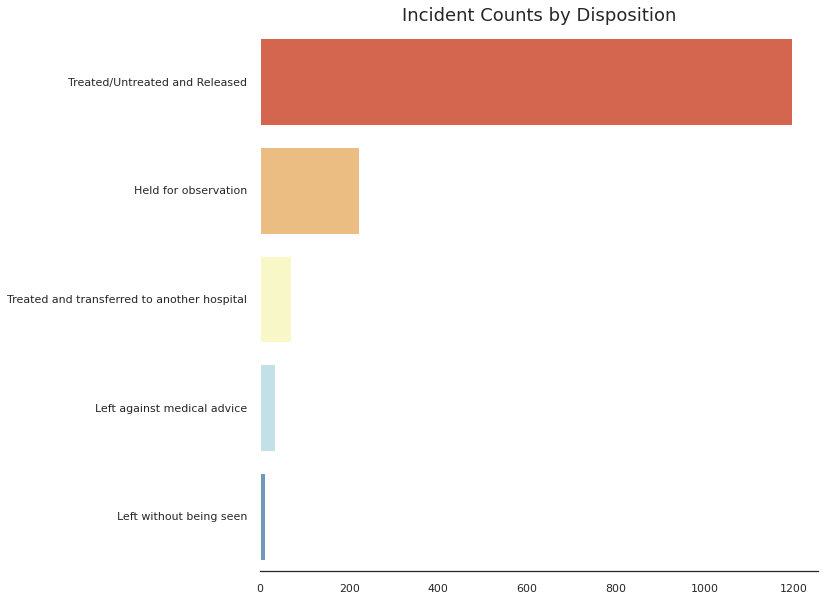

In [617]:
# Incident Counts by Disposition

incidentDis = df_injury['Disposition'].value_counts().reset_index(name='incidents').head()

#define figure size
sns.set(rc={"figure.figsize":(10,10)})

#set background color
sns.set_style("white")

ax = sns.barplot(x = "incidents", 
                 y = "index", 
                 data = incidentDis, 
                 palette = "RdYlBu")

#set x,y labels
ax.set(xlabel = '',
       ylabel = '')

ax.set_title('Incident Counts by Disposition', 
             fontdict = {'fontsize':18})

#set title
# ax.set_ylabel('', fontdict= {'fontsize':25})

#remove spine
sns.despine(left=True)

#save to png
# ax.figure.savefig("Incident Counts by Disposition.png")

plt.show()

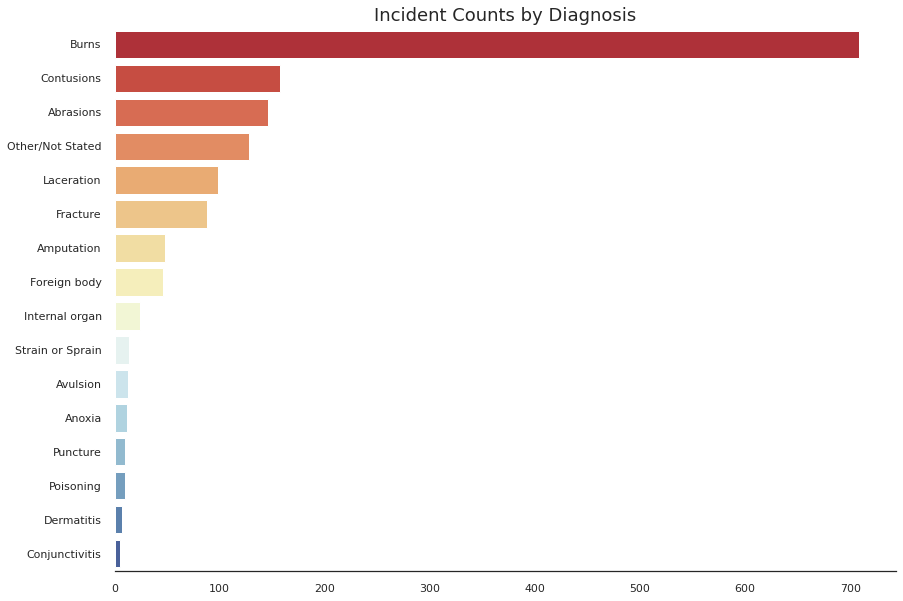

In [620]:
# Incident Counts by Diagnosis

incidentDia = df_injury['Diagnosis'].value_counts().reset_index(name='incidents').head(16)

#define figure size
sns.set(rc={"figure.figsize":(14,10)})

#set background color
sns.set_style("white")

ax = sns.barplot(x = "incidents", 
                 y = "index", 
                 data = incidentDia, 
                 palette = "RdYlBu")

#set x,y labels
ax.set(xlabel = '',
       ylabel = '')

#set title
ax.set_title('Incident Counts by Diagnosis', 
             fontdict = {'fontsize':18})

#remove spine
sns.despine(left=True)

#set y axis labels (shortened longer labels to fit for print out)
ax.set_yticklabels(['Burns', 'Contusions', 'Abrasions','Other/Not Stated',
                    'Laceration','Fracture','Amputation','Foreign body',
                    'Internal organ','Strain or Sprain','Avulsion',
                    'Anoxia','Puncture','Poisoning','Dermatitis', 'Conjunctivitis',
                    'Concussions','Hematoma'])

#save to png
ax.figure.savefig("Incident Counts by Diagnosis.png")

plt.show()

AttributeError: ignored

# __Import Firework Sales Data (State)__

In [561]:
sales_state = 'https://github.com/drusho/fireworks_data_exploration/raw/main/data/data_raw/State%20Imports%20by%20HS%20Commodities.csv'
df_sales_st = pd.read_csv(sales_state,skiprows=4,usecols=[0,1,2,3])
df_sales_st.head()

,State,Commodity,Time,Total Value ($US)
0,Alabama,360410 Fireworks,2016,"29,602,090"
1,Alabama,360410 Fireworks,2017,"19,396,430"
2,Alabama,360410 Fireworks,2018,"26,399,895"
3,Alabama,360410 Fireworks,2019,"28,353,392"
4,Alabama,360410 Fireworks,2020,"23,141,950"


# __Import Firework Sales Data (Country)__

In [562]:
sales_wd = 'https://raw.githubusercontent.com/drusho/fireworks_data_exploration/main/data/data_raw/World%20Imports%20by%20HS%20Commodities.csv'
df_sales_wd = pd.read_csv(sales_wd,skiprows=3,usecols=[0,1,2,3])
df_sales_wd.head()

,Country,Commodity,Time,Total Value ($US)
0,Cameroon,360410 Fireworks,2020,"37,803"
1,Asia Near East,360410 Fireworks,2018,"3,052,920"
2,Israel,360410 Fireworks,2018,"3,052,920"
3,Asia - South,360410 Fireworks,2016,"41,108"
4,Bangladesh,360410 Fireworks,2016,"41,108"
